In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import decimal
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

In [4]:
%matplotlib inline

In [5]:
dados = pd.read_csv('brazil_covid19.csv')

In [6]:
dados['TdM'] = dados.deaths/dados.cases
dados.TdM.fillna(0,inplace=True)
dados.TdM = dados.TdM*100
dados.TdM = dados.TdM.round(2)

In [7]:
fp = 'UFEBRASIL.shp'

In [8]:
brazilmapa = gpd.read_file(fp)

In [9]:
dados.state = dados.state.apply(lambda x:x.upper())
dados.state = dados.state.replace('ESPÍRITO SANTO','ESPIRITO SANTO')

In [10]:
siglas = {
    'DISTRITO FEDERAL': 'DF',
    'GOIÁS':'GO',
    'MATO GROSSO':'MT',
    'MATO GROSSO DO SUL' : 'MS',
    'ALAGOAS': 'AL', 
    'BAHIA':'BA', 
    'CEARÁ' : 'CE', 
    'MARANHÃO':'MA', 
    'PARAÍBA':'PB', 
    'PERNAMBUCO':'PE',  
    'PIAUÍ': 'PI', 
    'RIO GRANDE DO NORTE':'RN', 
    'SERGIPE':'SE', 
    'ACRE':'AC', 
    'AMAPÁ':'AP',
    'AMAZONAS':'AM', 
    'PARÁ':'PA', 
    'RONDÔNIA':'RO', 
    'RORAIMA':'RR', 
    'TOCANTINS':'TO',       
    'ESPIRITO SANTO':'ES', 
    'MINAS GERAIS':'MG', 
    'RIO DE JANEIRO':'RJ', 
    'SÃO PAULO':'SP',
    'PARANÁ':'PR', 
    'RIO GRANDE DO SUL':'RS', 
    'SANTA CATARINA':'SC',
}

In [11]:
estados = dados.state.unique()
populacao = np.array([3015268,7018354,3484466,2778986,3337357, 14873064, 9132078, 7075181, 4018127, 9557071, 3273227, 3506853, 2298696, 881935, 845731, 4144597, 8602865, 1777225, 605761, 1572866, 4018650, 21168791, 17264943, 45919049, 11433957, 11377239,7164788])
estapop = np.array([estados,populacao])
popest = pd.DataFrame(estapop).transpose()
popest.set_axis(['state','pop'], axis=1, inplace=True)

/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



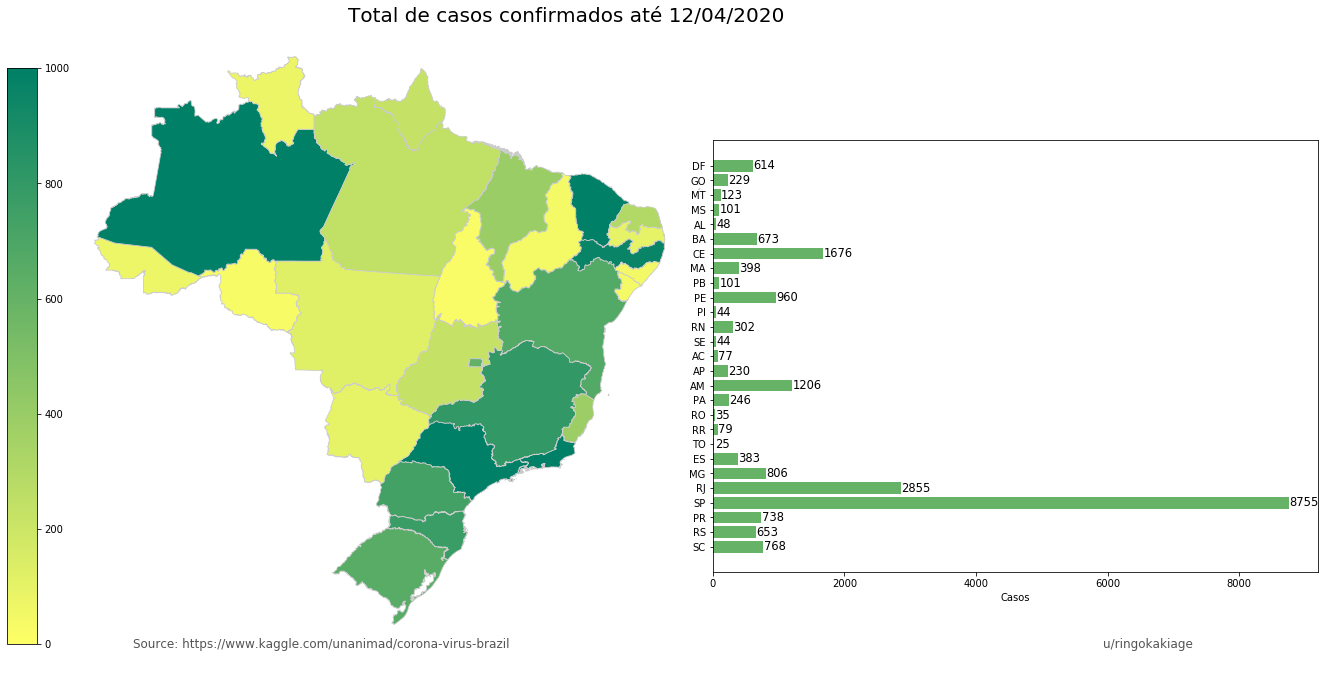

In [31]:
#first version
onebyone =  dados[dados['date']=='2020-04-12']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
variable = 'cases'
vmin, vmax = 0, 1000
merged.reset_index(inplace=True)
fig, ax = plt.subplots(1, figsize=(14,10))
merged.plot(column=variable,cmap='summer_r',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de casos confirmados até 12/04/2020', fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='summer_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax= cbaxes)
ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(onebyone.state)),width=onebyone.cases[::-1], align='center', tick_label=onebyone.state.replace(siglas)[::-1], alpha=0.6, color='green')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(onebyone.cases[::-1]):
    ax2.text(v+5, i, str(v), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos')
plt.tight_layout()

#fig.savefig('20_04_12v3.png',dpi=300, bbox_inches='tight')

In [32]:
fig.savefig('20_04_12v3.png',dpi=300, bbox_inches='tight')

In [9]:
dados.date.unique()

array(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-

/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



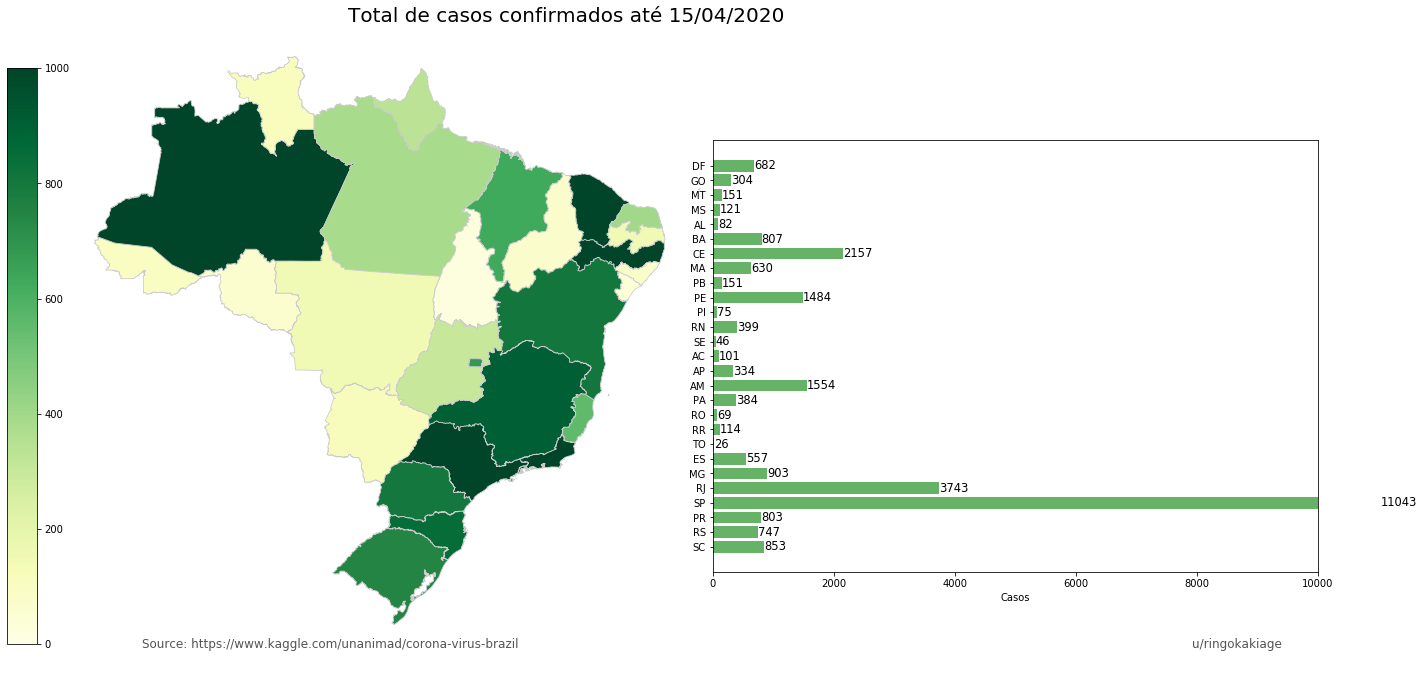

In [10]:
onebyone =  dados[dados['date']=='2020-04-15']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
variable = 'cases'
vmin, vmax = 0, 1000
merged.reset_index(inplace=True)
fig, ax = plt.subplots(1, figsize=(14,10))
merged.plot(column=variable,cmap='YlGn',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de casos confirmados até 15/04/2020', fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax= cbaxes)
ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(onebyone.state)),width=onebyone.cases[::-1], align='center', tick_label=onebyone.state.replace(siglas)[::-1], alpha=0.6, color='green')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(onebyone.cases[::-1]):
    ax2.text(v+2, i, str(v), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos')
plt.xlim(right=10000)
plt.tight_layout()

/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



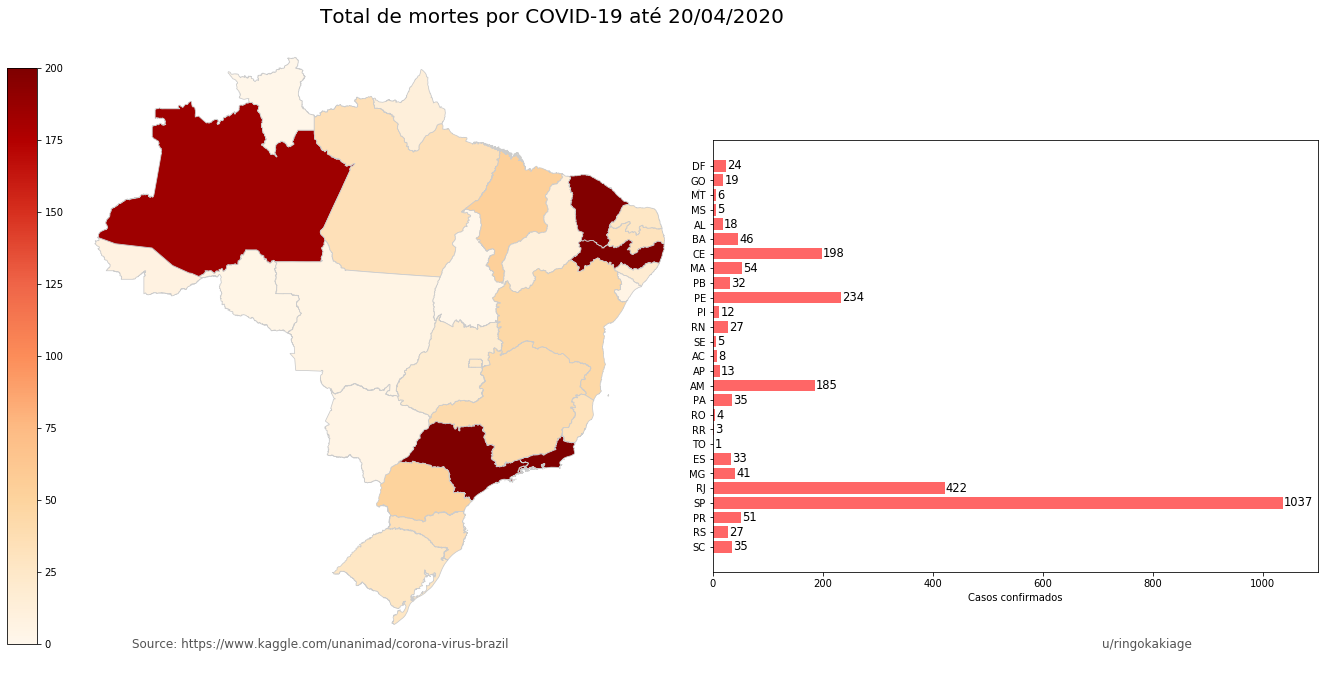

In [35]:
dia1 = '20/04/2020'
onebyone =  dados[dados['date']=='2020-04-20']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
variable = 'deaths'
vmin, vmax = 0, 200
merged.reset_index(inplace=True)
fig, ax = plt.subplots(1, figsize=(14,10))
merged.plot(column=variable,cmap='OrRd',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de mortes por COVID-19 até {}'.format(dia1), fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax= cbaxes)
ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(onebyone.state)),width=onebyone.deaths[::-1], align='center', tick_label=onebyone.state.replace(siglas)[::-1], alpha=0.6, color='red')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(onebyone.deaths[::-1]):
    ax2.text(v+2, i, str(v), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos confirmados')
plt.xlim(right=1100)
plt.tight_layout()
## fig.savefig('20_03_29_mortos_blob.png',dpi=300, bbox_inches='tight')

/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



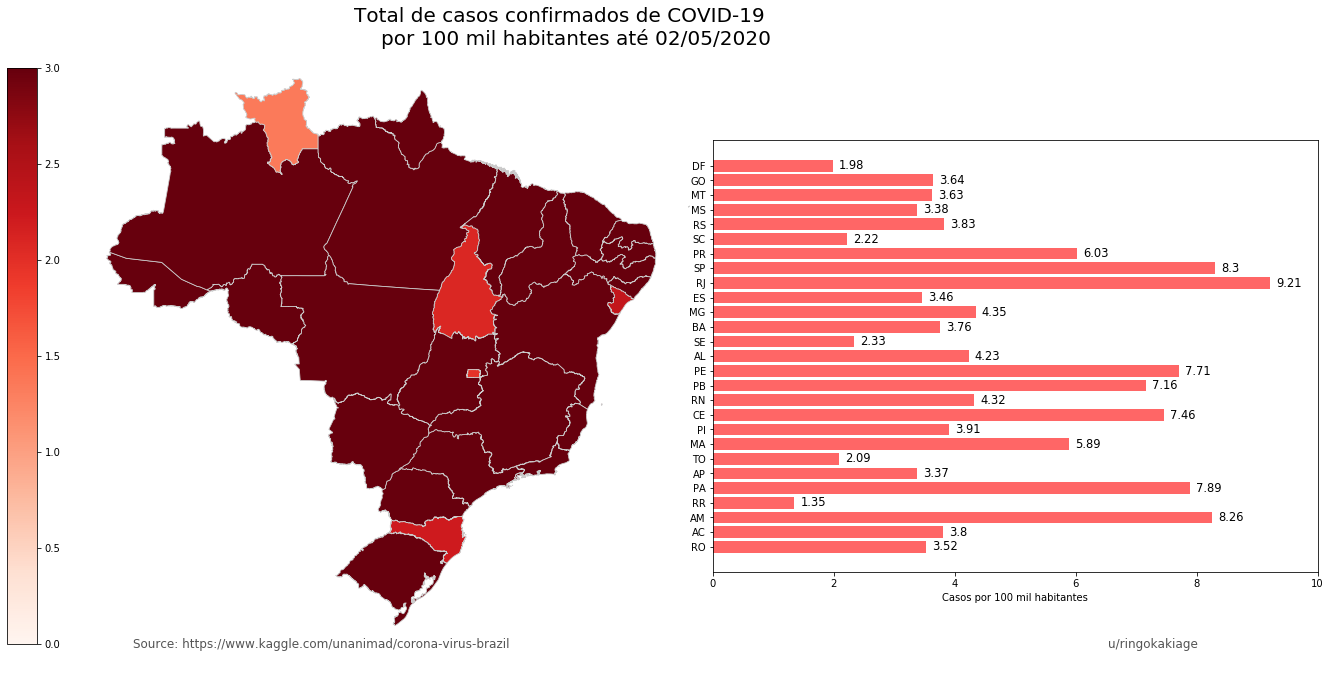

In [118]:
##casos por 100k habitantes:
dia1 = '02/05/2020'
onebyone =  dados[dados['date']=='2020-05-02']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
vmin, vmax = 0, 3
merged.reset_index(inplace=True)

mergedmais = merged.set_index('NM_ESTADO').join(popest.set_index('state'))
mergedmais.reset_index(inplace=True)
mergedmais['pop'] = mergedmais['pop'].astype(str).astype(int)
mergedmais['cases/100k'] = ((mergedmais.cases/mergedmais['pop'])*100000)
mergedmais['deaths/100k'] = ((mergedmais.deaths/mergedmais['pop'])*100000)

#variavel a ser apresentada
variable = 'TdM'

fig, ax = plt.subplots(1, figsize=(14,10))
mergedmais.plot(column=variable,cmap='Reds',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de casos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Reds' ,norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax=cbaxes)

ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='red')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(mergedmais[variable]):
    blob = decimal.Decimal(v)
    ax2.text(v+0.1, i, round(v,2), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos por 100 mil habitantes')
plt.xlim(right=10)
plt.tight_layout()

In [17]:
onebyone.state

2187       DISTRITO FEDERAL
2188                  GOIÁS
2189            MATO GROSSO
2190     MATO GROSSO DO SUL
2191                ALAGOAS
2192                  BAHIA
2193                  CEARÁ
2194               MARANHÃO
2195                PARAÍBA
2196             PERNAMBUCO
2197                  PIAUÍ
2198    RIO GRANDE DO NORTE
2199                SERGIPE
2200                   ACRE
2201                  AMAPÁ
2202               AMAZONAS
2203                   PARÁ
2204               RONDÔNIA
2205                RORAIMA
2206              TOCANTINS
2207         ESPIRITO SANTO
2208           MINAS GERAIS
2209         RIO DE JANEIRO
2210              SÃO PAULO
2211                 PARANÁ
2212      RIO GRANDE DO SUL
2213         SANTA CATARINA
Name: state, dtype: object

In [27]:
mergedmais.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
NM_ESTADO      27 non-null object
ID             27 non-null int64
CD_GEOCODU     27 non-null object
NM_REGIAO      27 non-null object
geometry       27 non-null geometry
date           27 non-null object
region         27 non-null object
cases          27 non-null int64
deaths         27 non-null int64
TdM            27 non-null float64
pop            27 non-null int64
cases/100k     27 non-null float64
deaths/100k    27 non-null float64
dtypes: float64(3), geometry(1), int64(4), object(5)
memory usage: 2.9+ KB


In [31]:
(mergedmais['deaths/100k']/mergedmais['cases/100k'])*100

0     3.522205
1     3.978300
2     8.264599
3     1.347305
4     7.890173
5     3.369840
6     2.094241
7     5.886991
8     3.909774
9     7.678421
10    4.319180
11    7.156673
12    7.710252
13    4.227405
14    2.329451
15    3.710407
16    4.349975
17    3.450586
18    9.207282
19    8.295374
20    6.032172
21    2.216539
22    3.829524
23    3.383459
24    3.625378
25    3.636364
26    1.979566
dtype: float64

In [45]:
dados[dados['state']=='MINAS GERAIS'].cases.value_counts()

0       38
1        5
2        3
275      1
38       1
1189     1
35       1
498      1
1827     1
29       1
1308     1
153      1
1935     1
15       1
128      1
430      1
261      1
397      1
1548     1
1419     1
7        1
5        1
1154     1
130      1
2023     1
1021     1
806      1
205      1
884      1
370      1
1649     1
750      1
231      1
614      1
1758     1
83       1
903      1
1230     1
815      1
1586     1
1481     1
958      1
698      1
133      1
189      1
1283     1
314      1
655      1
525      1
1077     1
559      1
Name: cases, dtype: int64

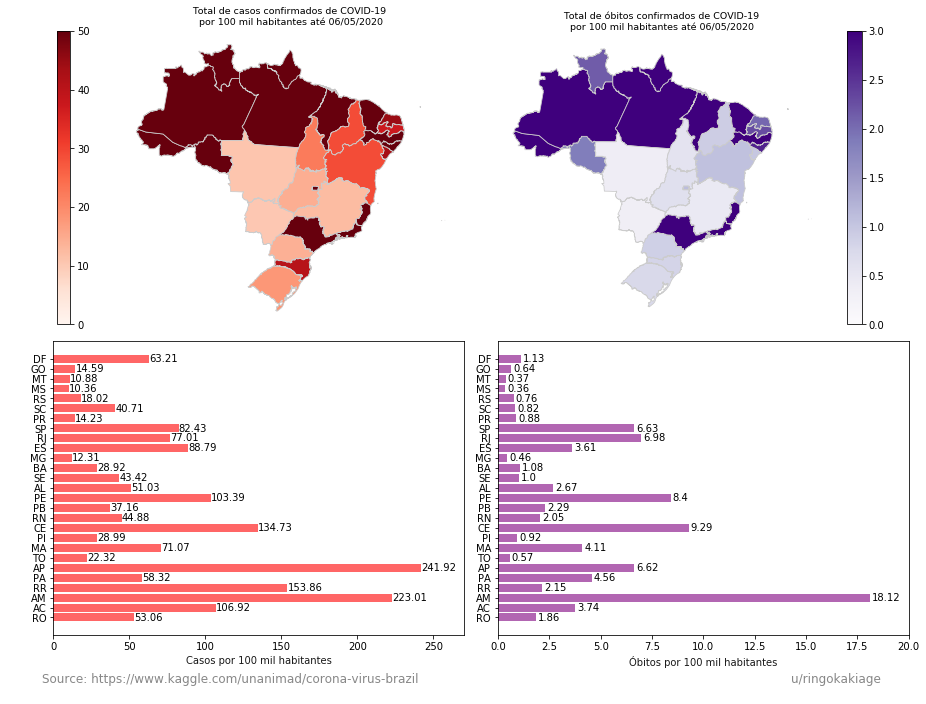

In [16]:
#standard settings for map plotting
dia1 = '06/05/2020'
onebyone =  dados[dados['date']=='2020-05-06']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
merged.reset_index(inplace=True)

#creating a dataframe for the 100k hab analysis
mergedmais = merged.set_index('NM_ESTADO').join(popest.set_index('state'))
mergedmais.reset_index(inplace=True)
mergedmais['pop'] = mergedmais['pop'].astype(str).astype(int)
mergedmais['cases/100k'] = ((mergedmais.cases/mergedmais['pop'])*100000)
mergedmais['deaths/100k'] = ((mergedmais.deaths/mergedmais['pop'])*100000)

#tentando plotar 2 mapas ao mesmo tempo
fig, axs = plt.subplots(2,2, figsize=(14,10))
(ax1,ax2) , (ax3,ax4) = axs

#variaveis a serem apresentadas
variable = 'cases/100k'
variable2 = 'deaths/100k'

#vmax and vmin
vmin1, vmax1 = 0, 50
vmin2, vmax2 = 0, 3

#plotando
mergedmais.plot(column=variable,cmap='Reds',linewidth=0.8,ax=ax1,edgecolor='0.8',vmin=vmin1, vmax=vmax1)
mergedmais.plot(column=variable2,cmap='Purples',linewidth=0.8,ax=ax2,edgecolor='0.8',vmin=vmin2, vmax=vmax2)
ax1.axis('off')
ax2.axis('off')

#colorbars
sm1 = plt.cm.ScalarMappable(cmap='Reds' ,norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
sm1._A= []
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('left', size='4%', pad=0.7)
cbar1 = fig.colorbar(sm1, ax=ax1, cax=cax1)

sm2 = plt.cm.ScalarMappable(cmap='Purples' ,norm=plt.Normalize(vmin=vmin2, vmax=vmax2))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=ax2)

rect_3 = ax3.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='red')
ax3.set_xlim(right=270)
rect_4 = ax4.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable2], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='purple')
ax4.set_xlim(right=20)

#colocando o valor de cada barra nos gráficos
for i, v in enumerate(mergedmais[variable]):
    ax3.text(v+0.1, i, round(v,2), fontsize=10, ha='left', va='center')
    
for i, v in enumerate(mergedmais[variable2]):
    ax4.text(v+0.1, i, round(v,2), fontsize=10, ha='left', va='center')

ax3.set_xlabel('Casos por 100 mil habitantes',alpha=0.9)
ax4.set_xlabel('Óbitos por 100 mil habitantes', alpha=0.9)

#titles
ax1.set_title('Total de casos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'9.5','fontweight':'3'},loc='center')
ax2.set_title('Total de óbitos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'9.5','fontweight':'3'},loc='center')

#sources
ax4.annotate('u/ringokakiage',xy=(0.95, .045),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
ax3.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.045, .045),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
    
plt.tight_layout()

In [19]:
mergedmais.cases.sum()

96559

In [22]:
mergedmais.deaths.sum()/mergedmais.cases.sum()

0.0699054464110026

In [37]:
mergedmais.cases - (round(mergedmais.deaths/0.03,2))

0      -113.67
1      -180.33
2    -10638.00
3       368.00
4     -5640.00
5      -146.33
6        57.67
7     -3661.67
8      -201.67
9    -12957.67
10     -600.67
11    -1432.67
12   -12788.33
13     -561.33
14      134.33
15     -785.00
16     -910.33
17     -448.33
18   -21820.67
19   -55026.00
20    -1508.00
21      612.67
22     -447.67
23      -34.00
24      -69.00
25     -175.00
26      532.67
dtype: float64

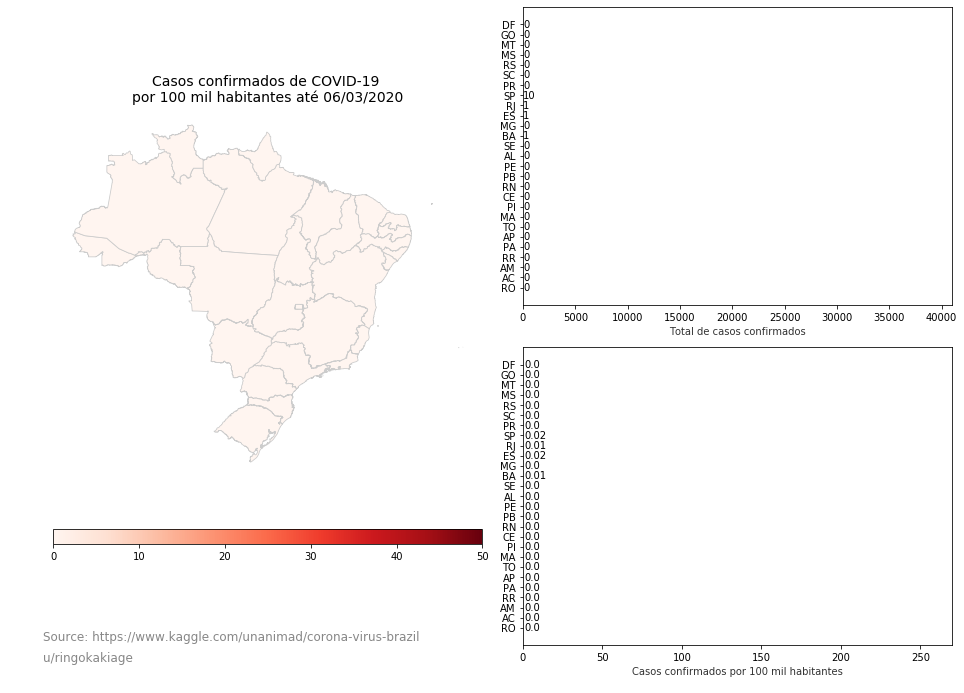

In [235]:
#standard settings for map plotting and visualization, easy if you save pict by pict
dia1 = '06/03/2020'
onebyone =  dados[dados['date']=='2020-03-06']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
merged.reset_index(inplace=True)

#creating a dataframe for the 100k/hab analysis
mergedmais = merged.set_index('NM_ESTADO').join(popest.set_index('state'))
mergedmais.reset_index(inplace=True)
mergedmais['pop'] = mergedmais['pop'].astype(str).astype(int)
mergedmais['cases/100k'] = ((mergedmais.cases/mergedmais['pop'])*100000)
mergedmais['deaths/100k'] = ((mergedmais.deaths/mergedmais['pop'])*100000)

#probably will add the "

#plotting a larger gridspec for the map
fig, axs = plt.subplots(2,2, figsize=(14,10))
(ax1,ax2),(ax3,ax4) = axs
bap = axs[1,-1].get_gridspec()
for ax in axs[0:,0]:
    ax.remove()
axbig = fig.add_subplot(bap[0:,0])

#variable for the barplots, usually "variable" is what will be shown at the geoplot
variable = 'cases/100k'
variable2 = 'cases'

#vmax and vmin
vmin1, vmax1 = 0, 50
vmin2, vmax2 = 0, 5000

#map plotting
mergedmais.plot(column=variable,cmap='Reds',linewidth=0.8,ax=axbig,edgecolor='0.8',vmin=vmin1, vmax=vmax1)
#mergedmais.plot(column=variable2,cmap='Purples',linewidth=0.8,ax=ax2,edgecolor='0.8',vmin=vmin2, vmax=vmax2)
axbig.axis('off')
#ax2.axis('off')

#colorbars
sm1 = plt.cm.ScalarMappable(cmap='Reds' ,norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
sm1._A= []
divider1 = make_axes_locatable(axbig)
cax1 = divider1.append_axes('bottom', size='4%', pad=0.7)
cbar1 = fig.colorbar(sm1, ax=axbig, cax=cax1, orientation='horizontal')

#sm2 = plt.cm.ScalarMappable(cmap='Purples' ,norm=plt.Normalize(vmin=vmin2, vmax=vmax2))
#sm2._A = []
#cbar2 = fig.colorbar(sm2, ax=ax2)

#plotting two barplots with revelant information that are going to be visualized, in this case, cases and cases/100k.
rect_4 = ax4.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='red')
ax4.set_xlim(right=270)
rect_2 = ax2.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable2], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.3, color='black')
ax2.set_xlim(right=41000)

#enumerating every value on each barplot
for i, v in enumerate(mergedmais[variable]):
    ax4.text(v+1, i, round(v,2), fontsize=10, ha='left', va='center')
    
for i, v in enumerate(mergedmais[variable2]):
    ax2.text(v+1, i, round(v,2), fontsize=10, ha='left', va='center')


#barplot titles    
ax4.set_xlabel('Casos confirmados por 100 mil habitantes',alpha=0.8, fontsize=10)
ax2.set_xlabel('Total de casos confirmados', alpha=0.8, fontsize=10)

#geoplot title
axbig.set_title('Casos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'14','fontweight':'3'},loc='center')
#ax2.set_title('Total de óbitos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'9.5','fontweight':'3'},loc='center')

#sources 
axbig.annotate('u/ringokakiage',xy=(0.045, .06),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
axbig.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.045, .09),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)

plt.tight_layout()

#saving the picture. 
#fig.savefig('100k_20_03_06.png',dpi=300, bbox_inches='tight')

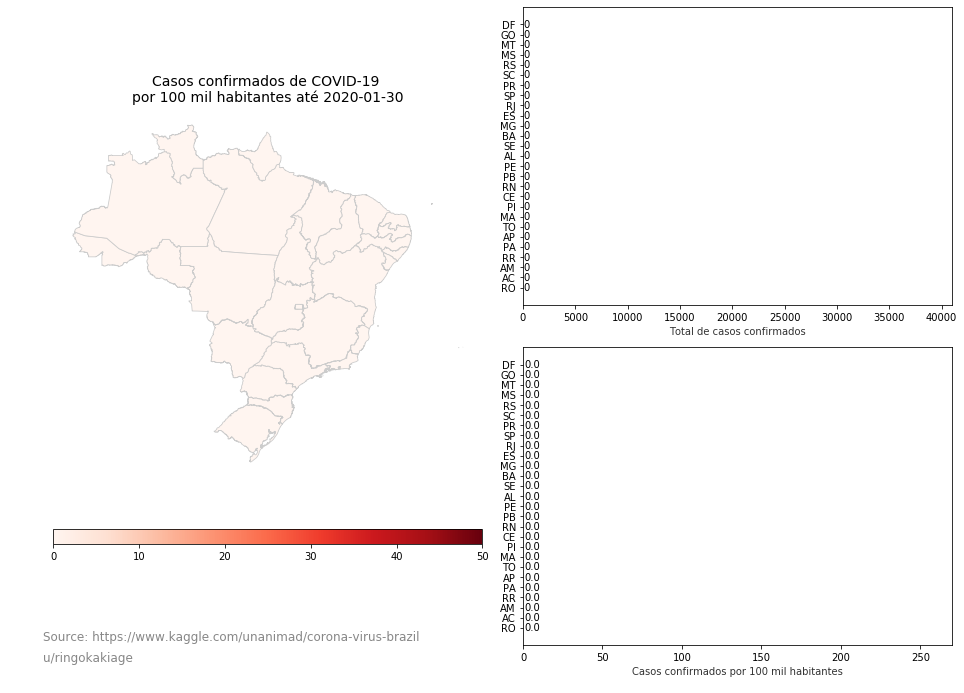

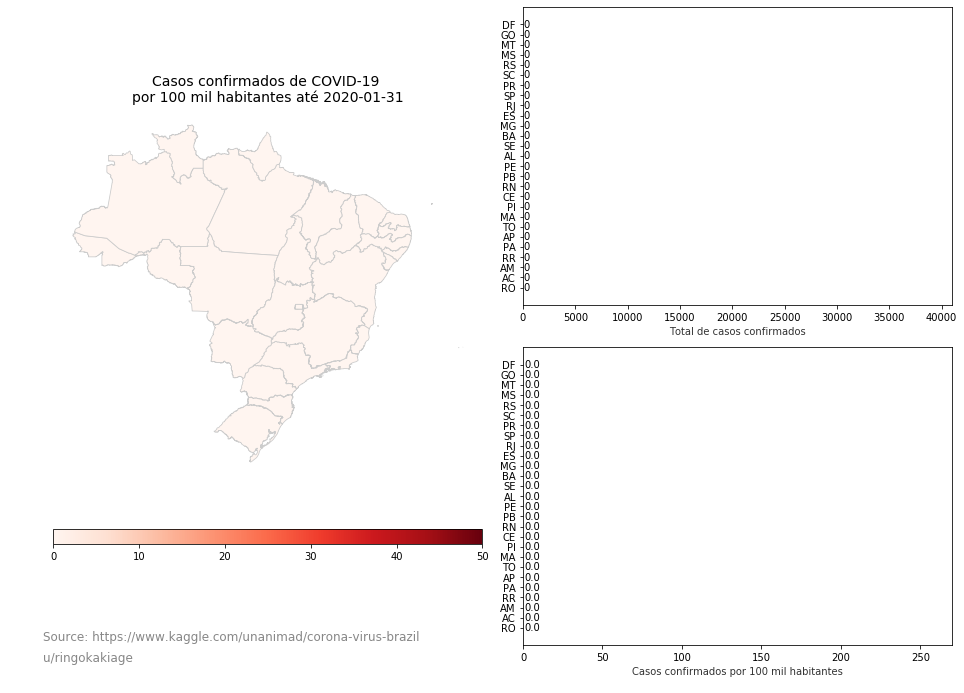

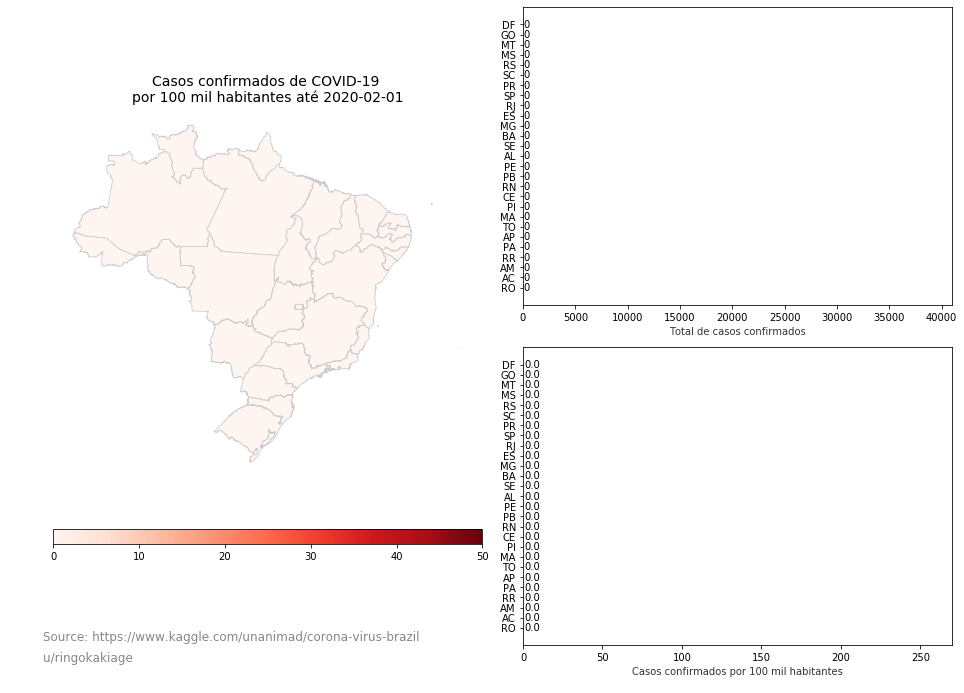

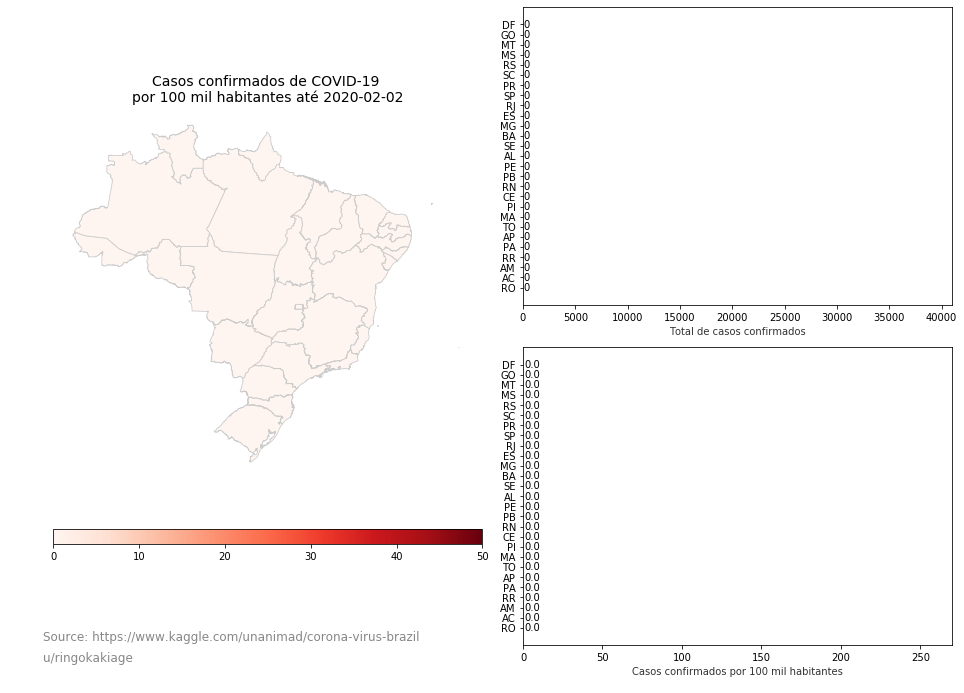

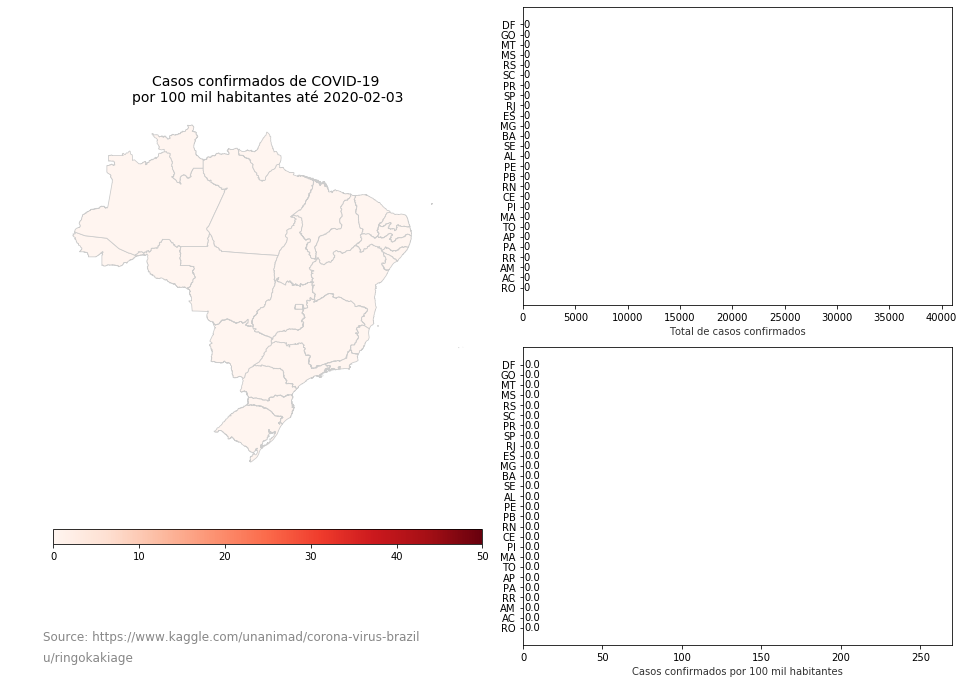

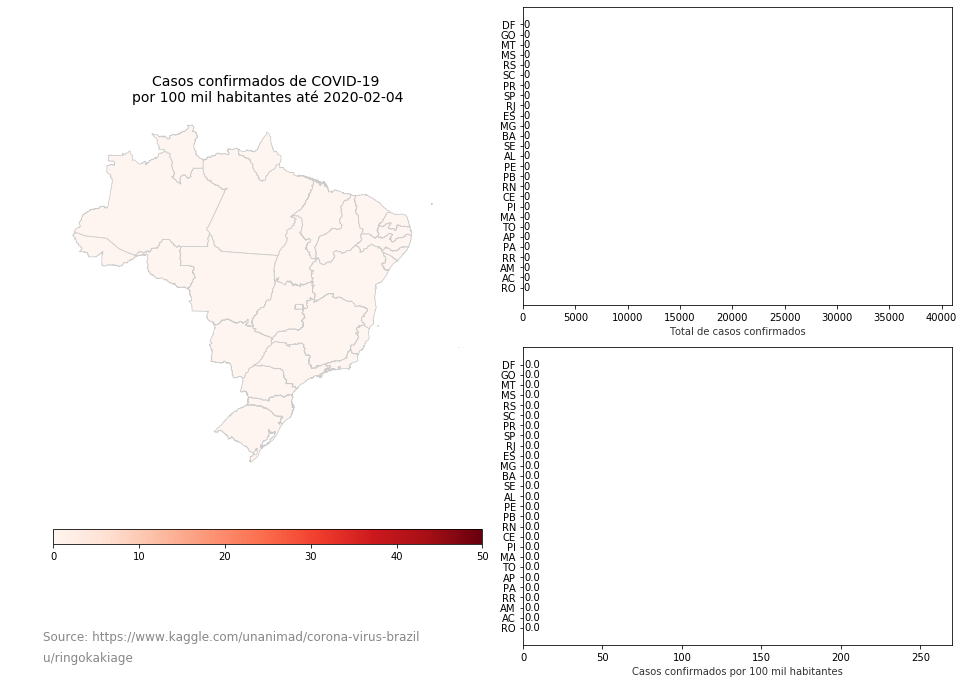

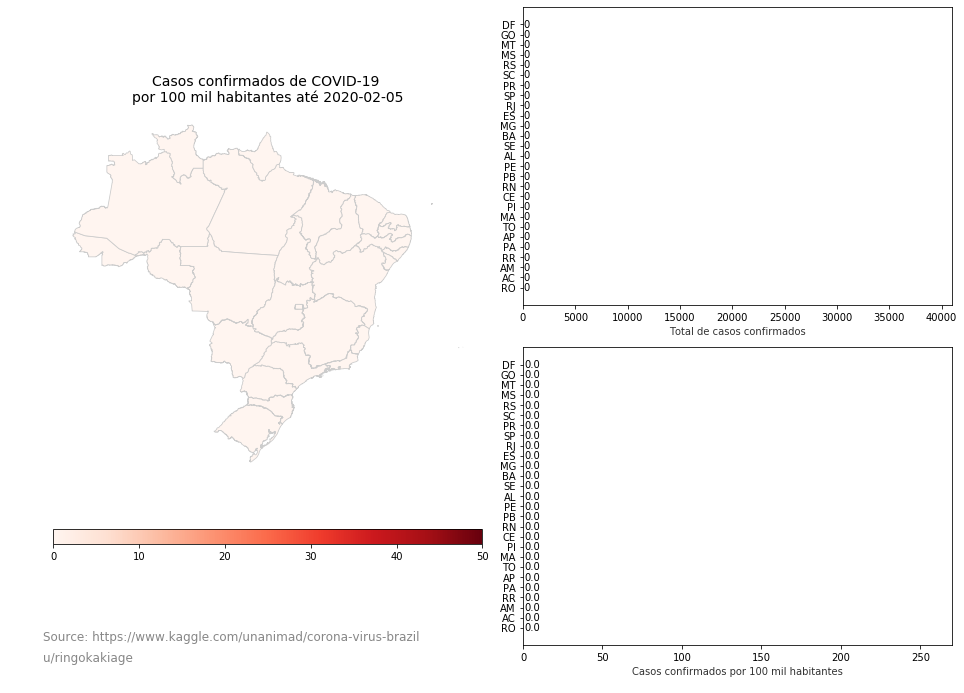

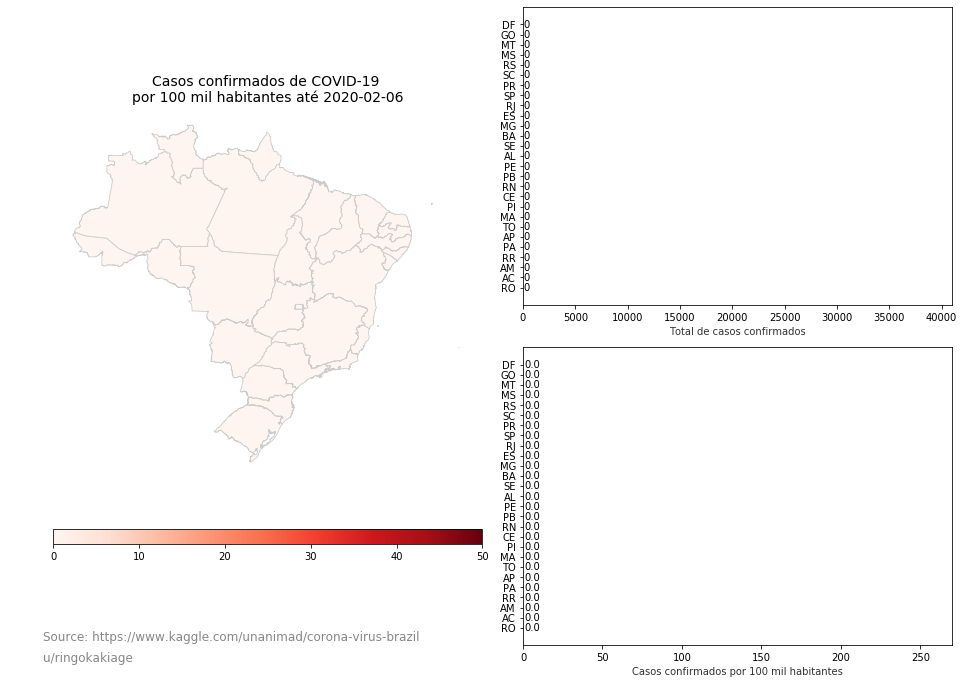

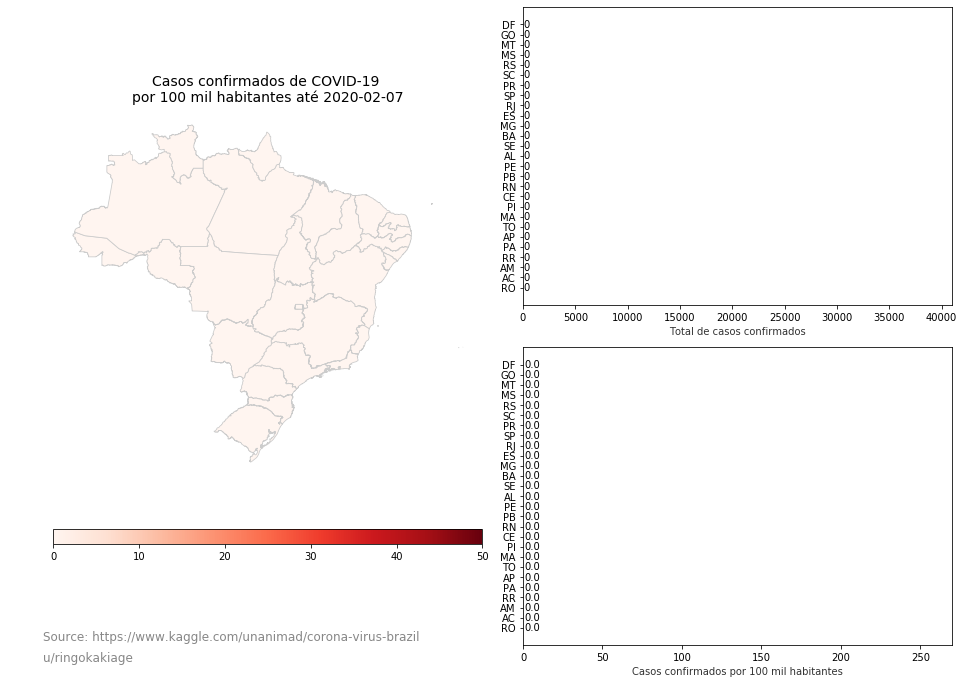

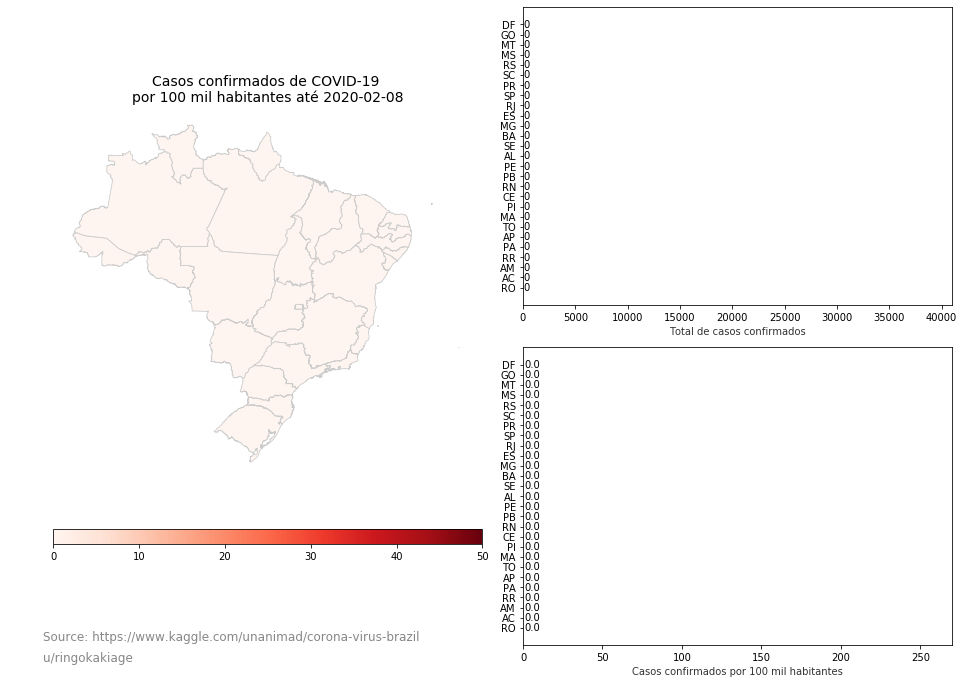

In [28]:
#making an array list to run the loop for saving all pictures. 36 is '2020-03-06' and I wanted to create a gif showing the 2-month effects of covid-19.
date_unique = dados.date.unique()[36:]

for x in date_unique:
    #standard settings for map plotting
    dia1 = x
    onebyone =  dados[dados['date'] == x]
    merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
    merged.reset_index(inplace=True)

#creating a dataframe for the 100k/hab analysis
    mergedmais = merged.set_index('NM_ESTADO').join(popest.set_index('state'))
    mergedmais.reset_index(inplace=True)
    mergedmais['pop'] = mergedmais['pop'].astype(str).astype(int)
    mergedmais['cases/100k'] = ((mergedmais.cases/mergedmais['pop'])*100000)
    mergedmais['deaths/100k'] = ((mergedmais.deaths/mergedmais['pop'])*100000)

#probably will add the "

#plotting a larger gridspec for the map
    fig, axs = plt.subplots(2,2, figsize=(14,10))
    (ax1,ax2),(ax3,ax4) = axs
    bap = axs[1,-1].get_gridspec()
    for ax in axs[0:,0]:
        ax.remove()
    axbig = fig.add_subplot(bap[0:,0])

#variable for the barplots, usually "variable" is what will be shown at the geoplot
    variable = 'cases/100k'
    variable2 = 'cases'

#vmax and vmin
    vmin1, vmax1 = 0, 50
    vmin2, vmax2 = 0, 5000

#map plotting
    mergedmais.plot(column=variable,cmap='Reds',linewidth=0.8,ax=axbig,edgecolor='0.8',vmin=vmin1, vmax=vmax1)
#mergedmais.plot(column=variable2,cmap='Purples',linewidth=0.8,ax=ax2,edgecolor='0.8',vmin=vmin2, vmax=vmax2)
    axbig.axis('off')
#ax2.axis('off')

#colorbars
    sm1 = plt.cm.ScalarMappable(cmap='Reds' ,norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
    sm1._A= []
    divider1 = make_axes_locatable(axbig)
    cax1 = divider1.append_axes('bottom', size='4%', pad=0.7)
    cbar1 = fig.colorbar(sm1, ax=axbig, cax=cax1, orientation='horizontal')

#sm2 = plt.cm.ScalarMappable(cmap='Purples' ,norm=plt.Normalize(vmin=vmin2, vmax=vmax2))
#sm2._A = []
#cbar2 = fig.colorbar(sm2, ax=ax2)

#plotting two barplots with revelant information that are going to be visualized, in this case, cases and cases/100k.
    rect_4 = ax4.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='red')
    ax4.set_xlim(right=270)
    rect_2 = ax2.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable2], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.3, color='black')
    ax2.set_xlim(right=41000)

#enumerating every value on each barplot
    for i, v in enumerate(mergedmais[variable]):
        ax4.text(v+1, i, round(v,2), fontsize=10, ha='left', va='center')
    
    for i, v in enumerate(mergedmais[variable2]):
        ax2.text(v+1, i, round(v,2), fontsize=10, ha='left', va='center')


#barplot titles    
    ax4.set_xlabel('Casos confirmados por 100 mil habitantes',alpha=0.8, fontsize=10)
    ax2.set_xlabel('Total de casos confirmados', alpha=0.8, fontsize=10)

#geoplot title
    axbig.set_title('Casos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'14','fontweight':'3'},loc='center')
#ax2.set_title('Total de óbitos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'9.5','fontweight':'3'},loc='center')

#sources 
    axbig.annotate('u/ringokakiage',xy=(0.045, .06),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
    axbig.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.045, .09),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)

    plt.tight_layout()
#saving the pictures. usually the file name changes accordingly to what i want to visualize
    fig.savefig('100k' + x + '.png',dpi=300, bbox_inches='tight')
    